In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:

from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

In [1]:
import tensorflow as tf
tf.config.list_physical_devices('GPU')

2023-10-23 03:03:04.938196: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-10-23 03:03:04.938293: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-10-23 03:03:04.938383: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-10-23 03:03:04.954261: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-23 03:03:06.825771: I tensorflow/compiler/

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

2023-10-23 03:14:27.774954: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-10-23 03:14:27.775050: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-10-23 03:14:27.775139: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-10-23 03:14:27.783938: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
# train = pd.read_csv('Data/train_data.csv', usecols=['Time (s)','ENC_X(um)', 'dENC_X(um)', 'ddENC_X(um)', 'EndPoint_X(um)']).dropna()
# test = pd.read_csv('Data/test_data.csv', usecols=['Time (s)', 'ENC_X(um)', 'dENC_X(um)', 'ddENC_X(um)', 'EndPoint_X(um)']).dropna()
train = pd.read_csv('Data/train_data_new.csv', usecols=['file', 'sample','ENC_POS_FLOATMAG_BH', 'dENC_X', 'ddENC_X', 'FLOATMAG_ACC_ADC_PORT_0', 'DAC_FLOATMAG_BH']).dropna()
test = pd.read_csv('Data/test_data_new.csv', usecols=['file', 'sample','ENC_POS_FLOATMAG_BH', 'dENC_X', 'ddENC_X', 'FLOATMAG_ACC_ADC_PORT_0', 'DAC_FLOATMAG_BH']).dropna()
train, test


(        sample  ENC_POS_FLOATMAG_BH  dENC_X  ddENC_X  FLOATMAG_ACC_ADC_PORT_0  \
 2            2                  1.0     0.0     -3.0                    114.0   
 3            3                  2.0     1.0      1.0                    -76.0   
 4            4                  2.0     0.0     -1.0                     49.0   
 5            5                  0.0    -2.0     -2.0                    -10.0   
 6            6                 -1.0    -1.0      1.0                     41.0   
 ...        ...                  ...     ...      ...                      ...   
 210217    3873             100001.0     0.0     -2.0                    243.0   
 210218    3874             100000.0    -1.0     -1.0                     46.0   
 210219    3875             100004.0     4.0      5.0                     85.0   
 210220    3876             100000.0    -4.0     -8.0                    -26.0   
 210221    3877             100001.0     1.0      5.0                    -64.0   
 
         DAC_F

In [4]:
# x_train = train[['ENC_X(um)', 'dENC_X(um)', 'ddENC_X(um)']]
# y_train = train['EndPoint_X(um)']

# x_test = test[['ENC_X(um)', 'dENC_X(um)', 'ddENC_X(um)']]
# y_test = test['EndPoint_X(um)']

x_train = train[['ENC_POS_FLOATMAG_BH', 'dENC_X', 'ddENC_X', "DAC_FLOATMAG_BH"]]
y_train = train['FLOATMAG_ACC_ADC_PORT_0']

x_test = test[['ENC_POS_FLOATMAG_BH', 'dENC_X', 'ddENC_X', "DAC_FLOATMAG_BH"]]
y_test = test['FLOATMAG_ACC_ADC_PORT_0']



c:\Users\Chirag\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


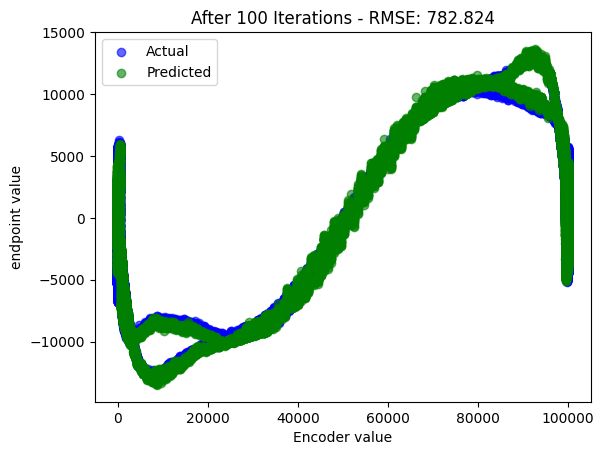

c:\Users\Chirag\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


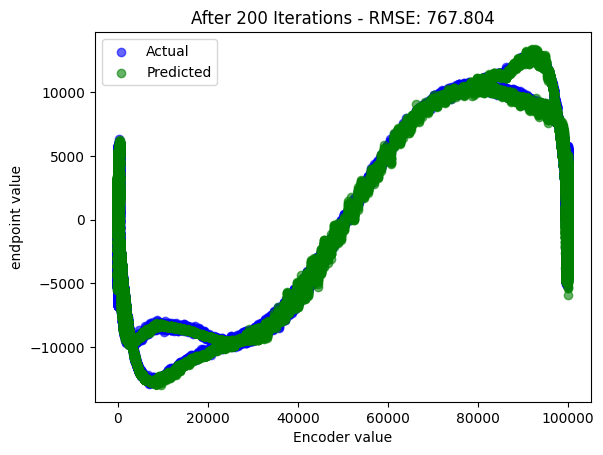

c:\Users\Chirag\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


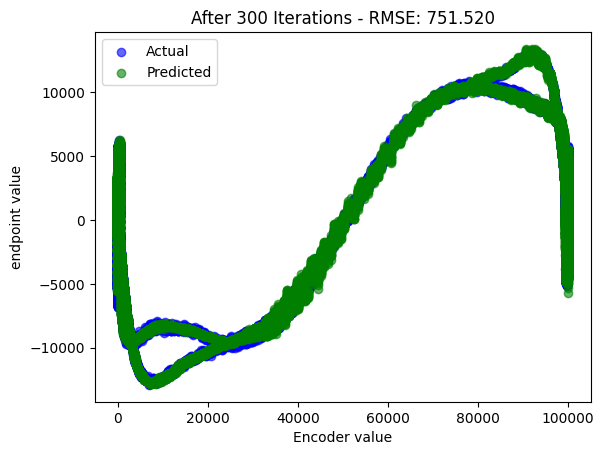

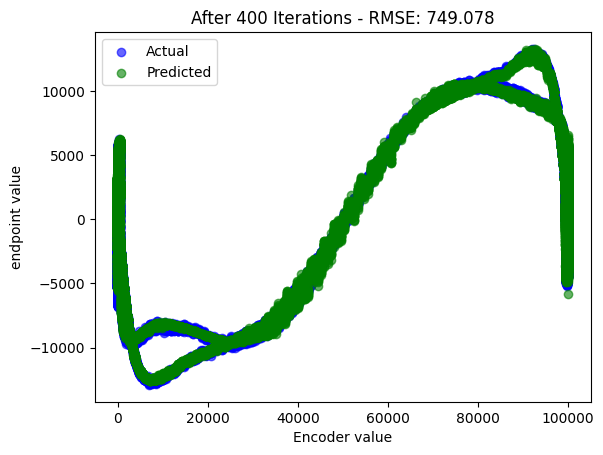

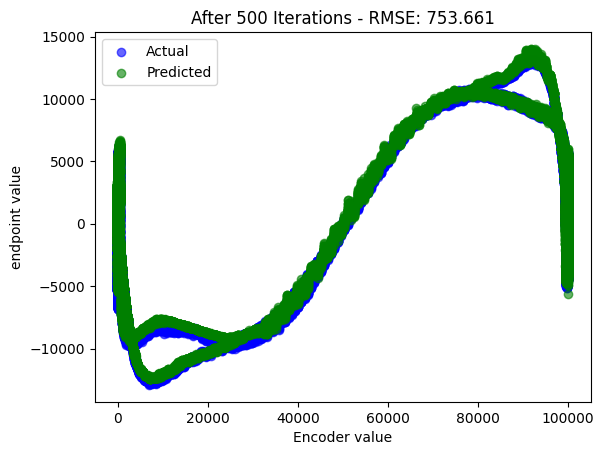

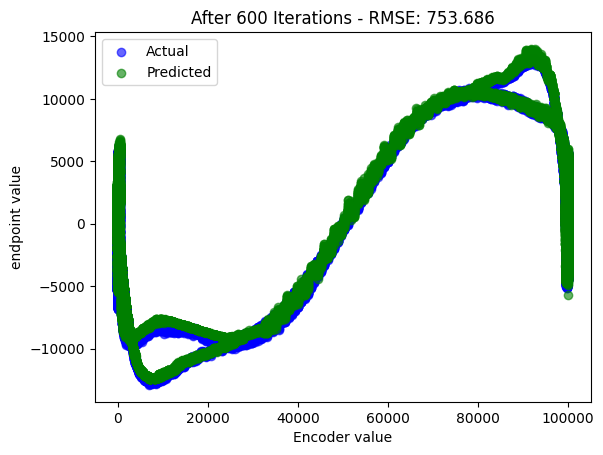

In [28]:
# Initialize the model and the pipeline with warm_start=True
model = MLPRegressor(hidden_layer_sizes=(20, 50, 20), max_iter=100, activation='relu', warm_start=True, random_state=42)
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('mlp', model)
])

# Number of loops
loops = 6

# Placeholder for RMSE values
rmse_values = []

for i in range(loops):
    # Fit the model for 100 iterations
    pipeline.fit(x_train, y_train)
    
    # Predict and calculate RMSE
    predictions = pipeline.predict(x_train)
    rmse = mean_squared_error(y_train, predictions, squared=False)
    rmse_values.append(rmse)
    
    # Visualize predictions vs actual values
    # plt.figure(figsize=(10, 6))

    #for old data (one trial)
    # plt.scatter(x_train['ENC_X(um)'], y_train, color='blue', alpha=0.6, label='Actual')
    # plt.scatter(x_train['ENC_X(um)'], predictions, color='green', alpha=0.6, label='Predicted')

    #for new data (multiple trials for one motion profile)
    plt.scatter(x_train['ENC_POS_FLOATMAG_BH'], y_train, color='blue', alpha=0.6, label='Actual')
    plt.scatter(x_train['ENC_POS_FLOATMAG_BH'], predictions, color='green', alpha=0.6, label='Predicted')
    
    plt.title(f'After {100 * (i + 1)} Iterations - RMSE: {rmse:.3f}')
    plt.xlabel('Encoder value')
    plt.ylabel('endpoint value')
    plt.legend()
    plt.show()
    


Text(0.5, 1.0, 'RMSE Values')

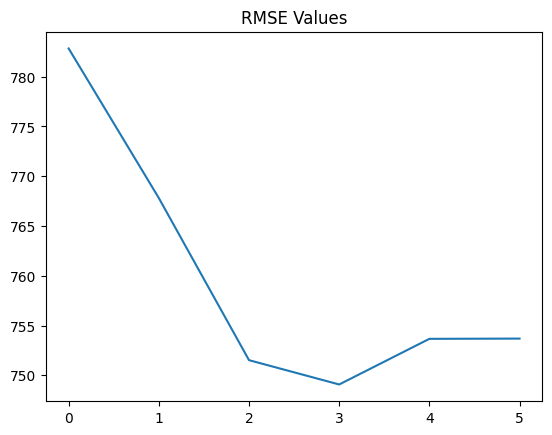

In [29]:
# for features: ENC_X(um), dENC_X(um), ddENC_X(um), DAC_FLOATMAG_BH


# Display RMSE values
plt.plot(rmse_values)
plt.title('RMSE Values')

Text(0.5, 1.0, 'RMSE Values')

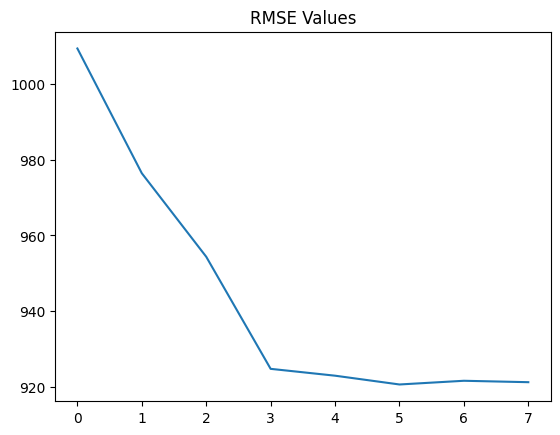

In [8]:
# for features: ENC_X(um), dENC_X(um), ddENC_X(um)


# Display RMSE values
plt.plot(rmse_values)
plt.title('RMSE Values')


In [11]:
test

,sample,ENC_POS_FLOATMAG_BH,dENC_X,ddENC_X,FLOATMAG_ACC_ADC_PORT_0
2,2,-2.0,0.0,-1.0,-15.0
3,3,-3.0,-1.0,-1.0,50.0
4,4,0.0,3.0,4.0,-96.0
5,5,-4.0,-4.0,-7.0,53.0
6,6,-3.0,1.0,5.0,-105.0
...,...,...,...,...,...
15641,1581,100011.0,4.0,1.0,804.0
15642,1582,100010.0,-1.0,-5.0,480.0
15643,1583,100010.0,0.0,1.0,846.0
15644,1584,100007.0,-3.0,-3.0,482.0


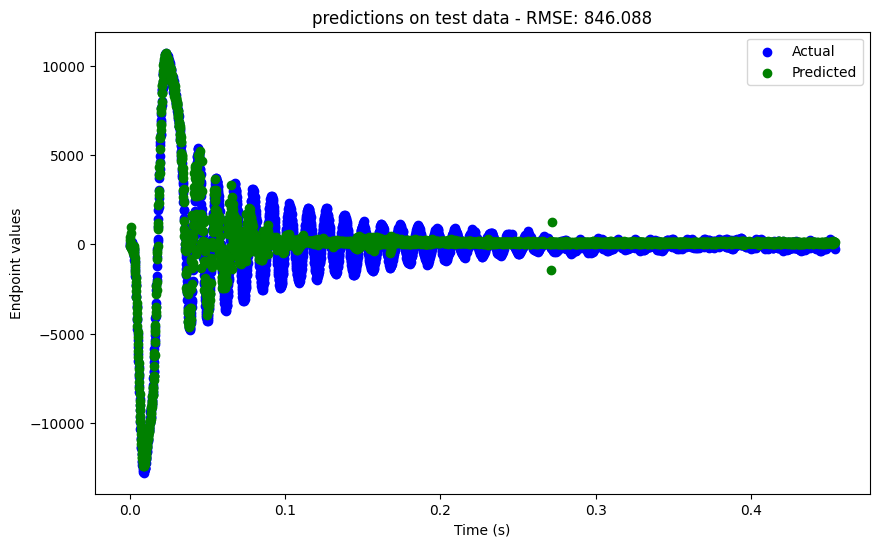

In [30]:
# for features: ENC_X(um), dENC_X(um), ddENC_X(um), DAC_FLOATMAG_BH

one_trial = test[test["file"] == 24]
x_test_one_trial = one_trial[['ENC_POS_FLOATMAG_BH', 'dENC_X', 'ddENC_X', 'DAC_FLOATMAG_BH']]
y_test_one_trial = one_trial['FLOATMAG_ACC_ADC_PORT_0']
times = one_trial['sample'] / 8000


predictions_test = pipeline.predict(x_test_one_trial)
rmse_test = mean_squared_error(y_test_one_trial, predictions_test, squared=False)

# Visualize predictions vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(times, y_test_one_trial, color='blue', label='Actual')
plt.scatter(times, predictions_test, color='green', label='Predicted')


plt.title(f'predictions on test data - RMSE: {rmse_test:.3f}')
plt.xlabel('Time (s)')
plt.ylabel('Endpoint values')
plt.legend()
plt.show()



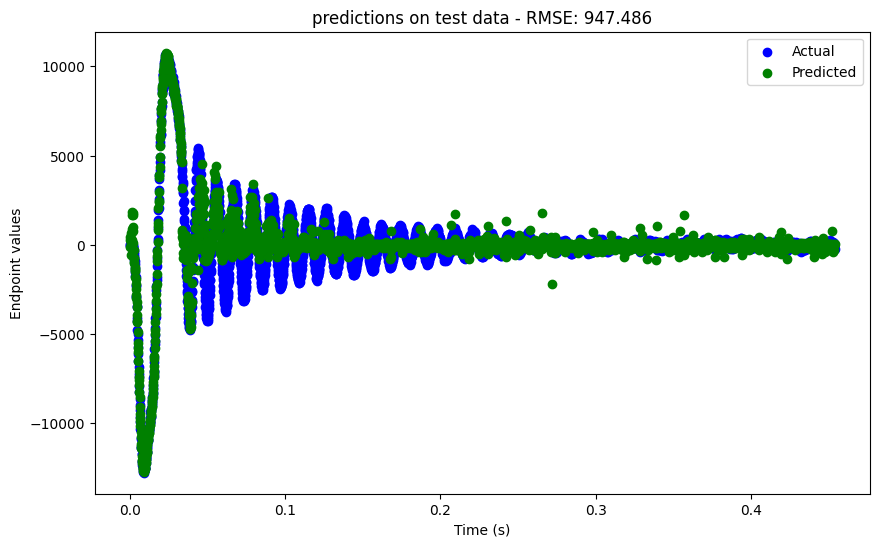

In [24]:
# for features: ENC_X(um), dENC_X(um), ddENC_X(um)

one_trial = test[test["file"] == 24]
x_test_one_trial = one_trial[['ENC_POS_FLOATMAG_BH', 'dENC_X', 'ddENC_X']]
y_test_one_trial = one_trial['FLOATMAG_ACC_ADC_PORT_0']
times = one_trial['sample'] / 8000


predictions_test = pipeline.predict(x_test_one_trial)
rmse_test = mean_squared_error(y_test_one_trial, predictions_test, squared=False)

# Visualize predictions vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(times, y_test_one_trial, color='blue', label='Actual')
plt.scatter(times, predictions_test, color='green', label='Predicted')


plt.title(f'predictions on test data - RMSE: {rmse_test:.3f}')
plt.xlabel('Time (s)')
plt.ylabel('Endpoint values')
plt.legend()
plt.show()



In [ ]:
#ok so currently performance is not good enough, and we definetely have reached the limit as to number of training iterations
#so we have to change some stuff:


#feature engineering
#currently just have encoder value, and its first and second derivatives
#Do we want to also add the doac values (the current delivered to the motor?)
#do we want to include the encoder command values?


#data preprocessing


#nn architecture

In [9]:
sequence_length = 20
num_features = 4

In [22]:
train[train["file"] == 0].iloc[:4].values

array([[   2.,    1.,    0.,   -3.,  114., -200.,    0.],
       [   3.,    2.,    1.,    1.,  -76., -191.,    0.],
       [   4.,    2.,    0.,   -1.,   49., -171.,    0.],
       [   5.,    0.,   -2.,   -2.,  -10., -142.,    0.]])

In [25]:
np.pad(train[train["file"] == 0].iloc[:4].values, ((5, 0),(0, 0)))

array([[   0.,    0.,    0.,    0.,    0.,    0.,    0.],
       [   0.,    0.,    0.,    0.,    0.,    0.,    0.],
       [   0.,    0.,    0.,    0.,    0.,    0.,    0.],
       [   0.,    0.,    0.,    0.,    0.,    0.,    0.],
       [   0.,    0.,    0.,    0.,    0.,    0.,    0.],
       [   2.,    1.,    0.,   -3.,  114., -200.,    0.],
       [   3.,    2.,    1.,    1.,  -76., -191.,    0.],
       [   4.,    2.,    0.,   -1.,   49., -171.,    0.],
       [   5.,    0.,   -2.,   -2.,  -10., -142.,    0.]])

In [26]:
train[train["file"] == 0].shape

(14282, 7)

In [ ]:
#data frame of zeros

np.zeros(sequence_length - 1, df.shape - 1)

In [65]:
def extract_sequences(df, sequence_length):

    #really the only restrictions are it should be:
    #a df
    #final column should be the target value

    sequence_matrix = []
    target_values = []
    
    zero_padded_matrix = np.concatenate([np.zeros((sequence_length - 1, df.shape[-1] - 1)), df.values], axis = 0) #creating zero padded matrix, so that we dont forget about the first few values. column size is not including the target values

    for indx, i in enumerate(range(len(df) - sequence_length + 1)):

        start_indx = i

        end_indx = start_indx + sequence_length

        # sequence_matrix = np.append(sequence_matrix, zero_padded_matrix[start_indx:end_indx])

        sequence_matrix.append(zero_padded_matrix[start_indx:end_indx][zero_padded_matrix.columns[:-1]])

        target_values.append()

        if indx == 5:
            return sequence_matrix

    return np.array(sequence_matrix)



In [63]:
a = extract_sequences(train[train["file"] == 0], 20)

In [68]:
np.array(a)[0][0]

array([0., 0., 0., 0., 0., 0., 0.])

In [10]:
for indx, i in enumerate(train[train["file"] == 0].rolling(window = sequence_length, min_periods=sequence_length)):
    print(indx, i)

    if indx == 3:
        break

0    sample  ENC_POS_FLOATMAG_BH  dENC_X  ddENC_X  FLOATMAG_ACC_ADC_PORT_0  \
2       2                  1.0     0.0     -3.0                    114.0   

   DAC_FLOATMAG_BH  file  
2           -200.0     0  
1    sample  ENC_POS_FLOATMAG_BH  dENC_X  ddENC_X  FLOATMAG_ACC_ADC_PORT_0  \
2       2                  1.0     0.0     -3.0                    114.0   
3       3                  2.0     1.0      1.0                    -76.0   

   DAC_FLOATMAG_BH  file  
2           -200.0     0  
3           -191.0     0  
2    sample  ENC_POS_FLOATMAG_BH  dENC_X  ddENC_X  FLOATMAG_ACC_ADC_PORT_0  \
2       2                  1.0     0.0     -3.0                    114.0   
3       3                  2.0     1.0      1.0                    -76.0   
4       4                  2.0     0.0     -1.0                     49.0   

   DAC_FLOATMAG_BH  file  
2           -200.0     0  
3           -191.0     0  
4           -171.0     0  
3    sample  ENC_POS_FLOATMAG_BH  dENC_X  ddENC_X  FLOATMAG_ACC_

In [ ]:
for file_num in range(train["file"].max() + 1):

    

In [4]:
#creating x_train, y_train for lstm

train[['ENC_POS_FLOATMAG_BH', 'dENC_X', 'ddENC_X', "DAC_FLOATMAG_BH"]]

,ENC_POS_FLOATMAG_BH,dENC_X,ddENC_X,DAC_FLOATMAG_BH
2,1.0,0.0,-3.0,-200.0
3,2.0,1.0,1.0,-191.0
4,2.0,0.0,-1.0,-171.0
5,0.0,-2.0,-2.0,-142.0
6,-1.0,-1.0,1.0,-127.0
...,...,...,...,...
210217,100001.0,0.0,-2.0,254.0
210218,100000.0,-1.0,-1.0,259.0
210219,100004.0,4.0,5.0,240.0
210220,100000.0,-4.0,-8.0,270.0


In [ ]:
x_train = train[['ENC_POS_FLOATMAG_BH', 'dENC_X', 'ddENC_X', "DAC_FLOATMAG_BH"]]
y_train = train['FLOATMAG_ACC_ADC_PORT_0']

x_test = test[['ENC_POS_FLOATMAG_BH', 'dENC_X', 'ddENC_X', "DAC_FLOATMAG_BH"]]
y_test = test['FLOATMAG_ACC_ADC_PORT_0']

In [17]:
model = Sequential()
model.add(LSTM(50, activation='tanh', recurrent_activation='sigmoid', recurrent_dropout=0, unroll=False, use_bias=True, input_shape=(sequence_length, num_features)))
model.add(Dense(1))


2023-10-23 03:31:56.021057: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:07:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-10-23 03:31:56.026952: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:07:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-10-23 03:31:56.026996: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:07:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-10-23 03:31:56.028983: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:07:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-10-23 03:31:56.029024: I tensorflow/compile

In [ ]:
model.compile(optimizer='adam', loss='mse')

In [ ]:
history = model.fit(X_train, Y_train, epochs=10, validation_data=(X_test, Y_test))

# 5. Evaluate Model
losses = pd.DataFrame(history.history)
losses.plot()

In [ ]:
model

In [12]:
for indx, i in enumerate(x_train.rolling(20, )):
    print(indx)
    print(i)
    if indx == 30:
        break

0
   ENC_POS_FLOATMAG_BH  dENC_X  ddENC_X  DAC_FLOATMAG_BH
2                  1.0     0.0     -3.0           -200.0
1
   ENC_POS_FLOATMAG_BH  dENC_X  ddENC_X  DAC_FLOATMAG_BH
2                  1.0     0.0     -3.0           -200.0
3                  2.0     1.0      1.0           -191.0
2
   ENC_POS_FLOATMAG_BH  dENC_X  ddENC_X  DAC_FLOATMAG_BH
2                  1.0     0.0     -3.0           -200.0
3                  2.0     1.0      1.0           -191.0
4                  2.0     0.0     -1.0           -171.0
3
   ENC_POS_FLOATMAG_BH  dENC_X  ddENC_X  DAC_FLOATMAG_BH
2                  1.0     0.0     -3.0           -200.0
3                  2.0     1.0      1.0           -191.0
4                  2.0     0.0     -1.0           -171.0
5                  0.0    -2.0     -2.0           -142.0
4
   ENC_POS_FLOATMAG_BH  dENC_X  ddENC_X  DAC_FLOATMAG_BH
2                  1.0     0.0     -3.0           -200.0
3                  2.0     1.0      1.0           -191.0
4                  2.

In [23]:
np.expand_dims(i.values, axis=0).shape

(1, 20, 4)

In [25]:
model(np.expand_dims(i.values, axis=0))

2023-10-23 03:34:29.621096: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:442] Loaded cuDNN version 8700


<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[0.24086599]], dtype=float32)>